In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_arrays import create_arr

In [2]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_n400.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_n400_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [10]:
i = 0 # in 0.1 s

In [11]:
arrs = create_arr(tube,frac,log10T,log10G,time=i,interp = 'linear')
x = arrs['x']
v = arrs['v']
T = arrs['T']
ne = arrs['ne']
wav = arrs['wav']
spec = arrs['spec']
EM = arrs['EM']
g = arrs['g']
fac = arrs['fac']
los_x = arrs['raw_x']
los_v = arrs['raw_v']

/Users/WilliamHenryAshfieldIV/synth_spec/create_arrays.py:111: RuntimeWarning: divide by zero encountered in true_divide
  factor = nei/eqi


(0, 14)

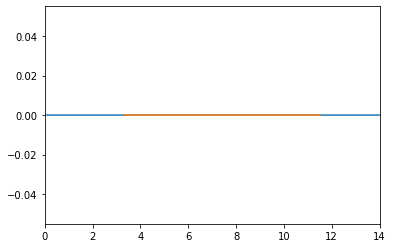

In [12]:
plt.plot(los_x,los_v)
plt.plot(x,v)
plt.xlim(0,14)

In [13]:
emiss = EM*10**g*fac
iis = np.where(emiss>0)
iis = iis[0]

if (len(iis)>0):
    x_l, x_r = x[iis[0]]-0.1,x[iis[-1]]+0.1

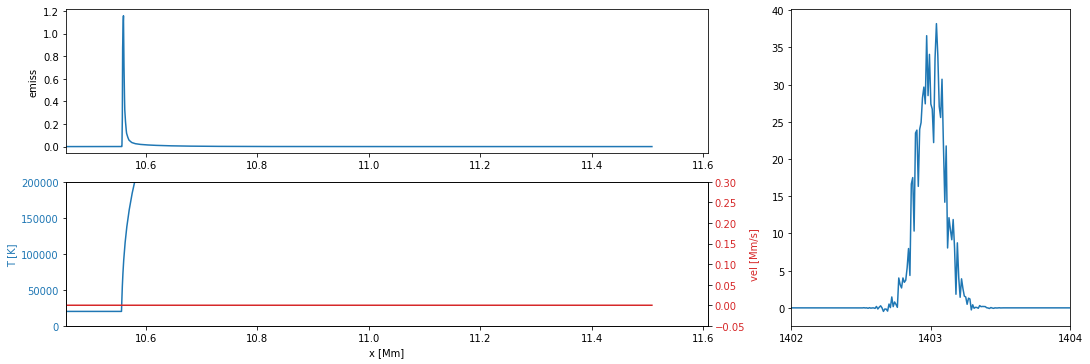

In [14]:
fig = plt.figure(figsize=(18,9))
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
plt.subplots_adjust(wspace=0.3)


ax1.plot(x,emiss,label='EM',color='tab:blue')
ax1.set_xlim(x_l,x_r)
ax1.set_ylabel('emiss')



color = 'tab:blue'
ax2.plot(x,T*1e6,color=color)
ax2.set_ylim(0,2*1e5)
ax2.set_xlabel('x [Mm]')
ax2.set_ylabel('T [K]', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(x_l,x_r)

ax4 = ax2.twinx()
color = 'tab:red'
ax4.plot(x, v, color=color)
ax4.set_ylabel('vel [Mm/s]', color=color)  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim(-0.05,0.3)


ax3.plot(wav,spec)
ax3.set_xlim(1402,1404)
ax3.set_xticks(np.arange(1402, 1405, 1))

(10.457019267230185, 11.608181412675368)

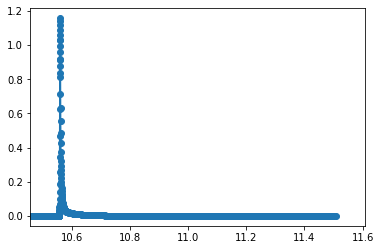

In [15]:
plt.plot(x,emiss,label='EM',color='tab:blue',marker='o')
plt.xlim(x_l,x_r)
#plt.ylim(0,10000)

(10.457019267230185, 11.608181412675368)

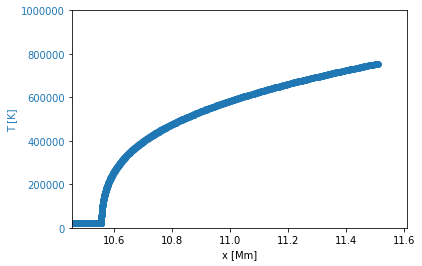

In [16]:
color = 'tab:blue'
plt.plot(x,T*1e6,color=color,marker = 'o')
plt.ylim(0,1*1e6)
plt.xlabel('x [Mm]')
plt.ylabel('T [K]', color=color)
plt.tick_params(axis='y', labelcolor=color)
plt.xlim(x_l,x_r)